<a href="https://colab.research.google.com/github/rachitss/Quant_Comp_Lab/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install qiskit[visualization] qiskit-aer matplotlib

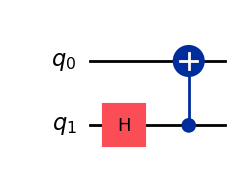

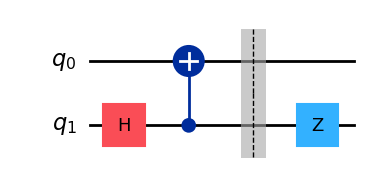

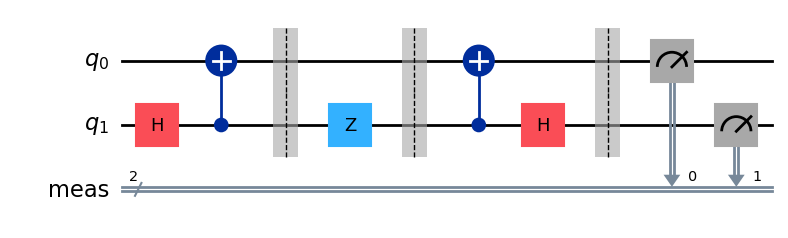

{'10': 1024}


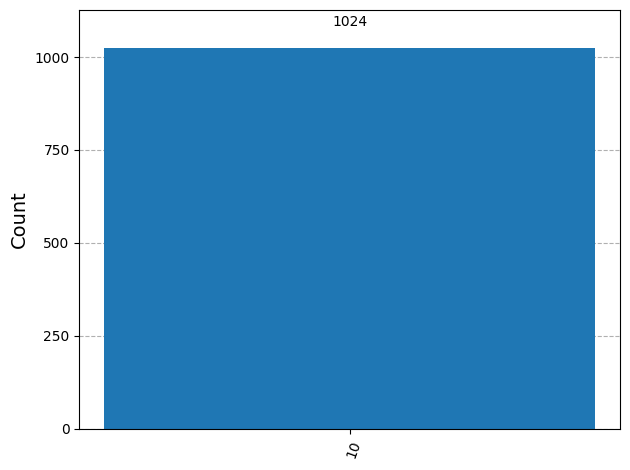

In [14]:
# Super Dense Coding

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

def create_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc
def encode_message(qc, qubit, msg):
    if len(msg) != 2 or not set(msg).issubset({"0","1"}):
        raise ValueError(f"message '{msg}' is invalid")
    if msg[1] == "1":
        qc.x(qubit)
    if msg[0] == "1":
        qc.z(qubit)
    return qc

def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

qc = create_bell_pair()
display(qc.draw('mpl'))

qc.barrier()
message = '10'
qc = encode_message(qc, 1, message)
display(qc.draw('mpl'))

qc.barrier()
qc = decode_message(qc)
qc.measure_all()
display(qc.draw('mpl'))

simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(qc)

print(counts)
plot_histogram(counts)

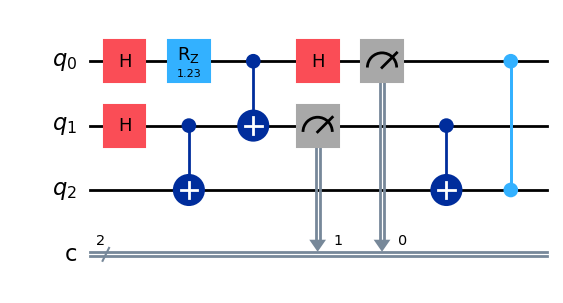

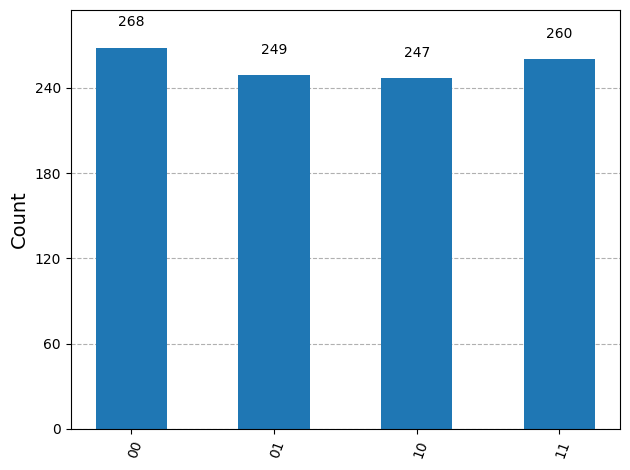

In [7]:
# Teleportation

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def teleportation_circuit():
    qc = QuantumCircuit(3, 2)

    qc.h(0)
    qc.rz(1.234, 0)

    qc.h(1)
    qc.cx(1, 2)

    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])

    qc.cx(1, 2)
    qc.cz(0, 2)

    return qc

qc = teleportation_circuit()
display(qc.draw('mpl'))

simulator = AerSimulator()
tq = transpile(qc, simulator)
result = simulator.run(tq).result()
plot_histogram(result.get_counts())

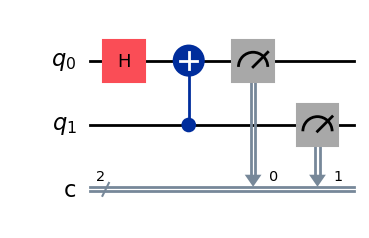

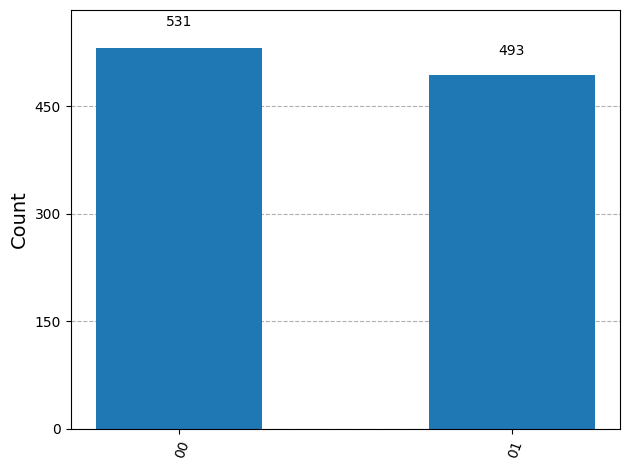

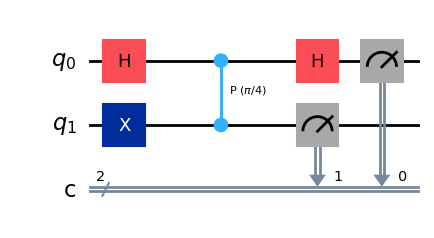

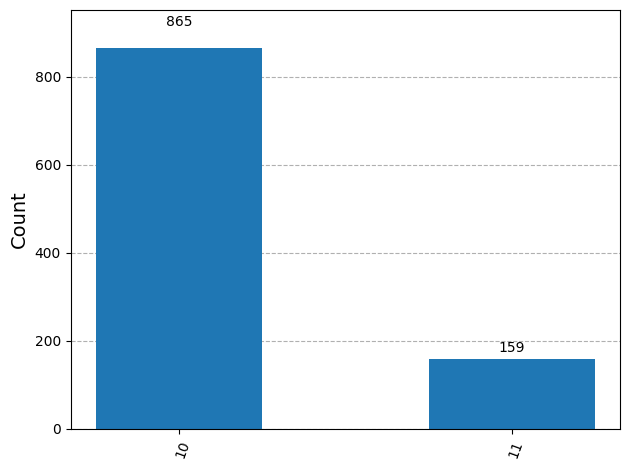

In [10]:
# Phase Kickback

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

def reverse_cnot_circuit():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(1, 0)
    qc.measure([0, 1], [0, 1])
    return qc

def phase_kickback_t_gate_circuit():
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.x(1)
    qc.cp(np.pi/4, 0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])
    return qc

qc_rev = reverse_cnot_circuit()
display(qc_rev.draw('mpl'))

simulator = AerSimulator()
compiled_qc_rev = transpile(qc_rev, simulator)
result_rev = simulator.run(compiled_qc_rev, shots=1024).result()
display(plot_histogram(result_rev.get_counts()))

qc_t = phase_kickback_t_gate_circuit()
display(qc_t.draw('mpl'))

compiled_qc_t = transpile(qc_t, simulator)
result_t = simulator.run(compiled_qc_t, shots=1024).result()
plot_histogram(result_t.get_counts())
